In [25]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
from flying_discs.morrison.base import MorrisonBaseCalculator
from flying_discs.morrison.constants import (
    HannahConstants,
    HummelConstants,
    MorrisonUltrastar,
    MorrisonUltrastarCode,
    PottsCrowtherConstants,
    StilleyCarstensConstants,
    YasudaConstants,
)

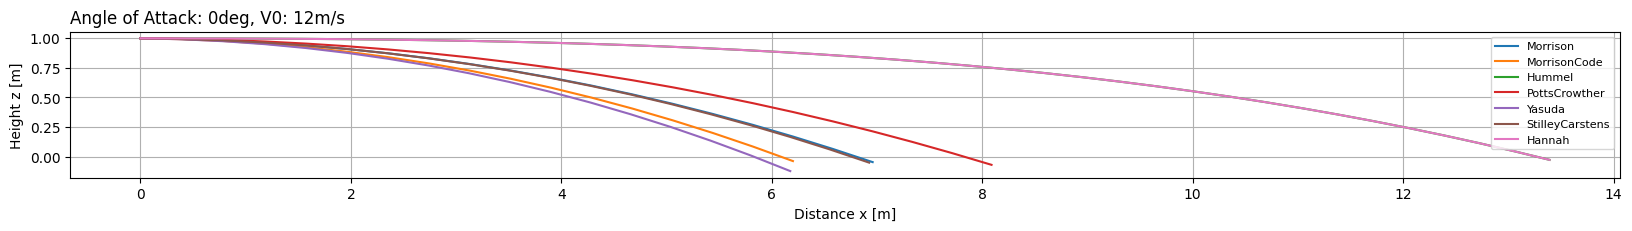

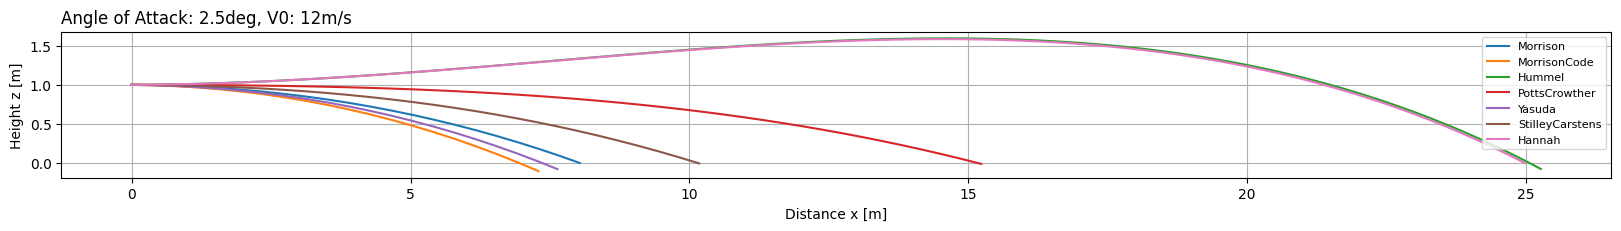

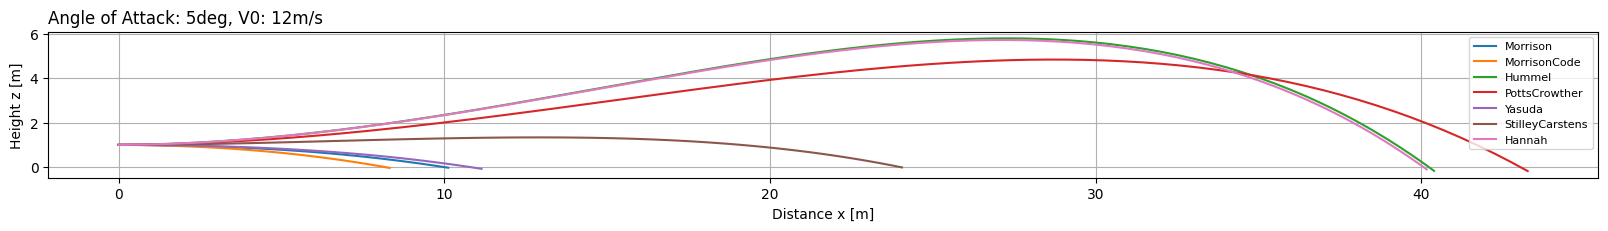

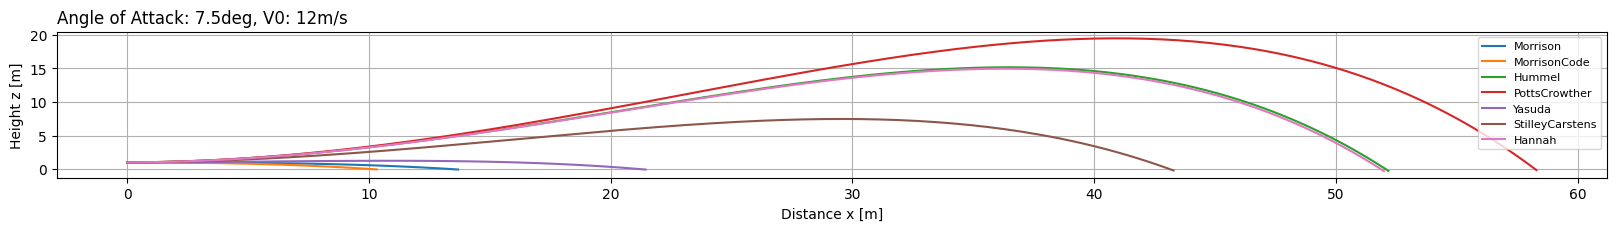

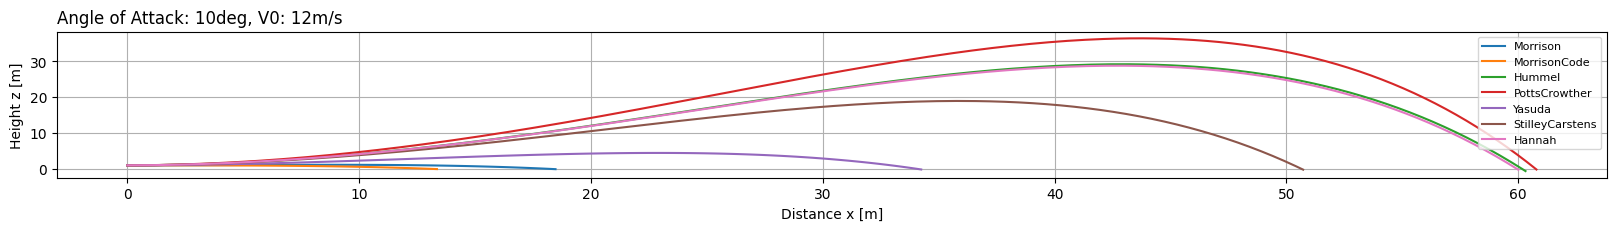

In [26]:
@dataclass
class Experiment:
    angle_of_attack: float
    v0: float
    direction = 0
    deltaT = 0.033


experiments = [Experiment(0, 12), Experiment(2.5, 12), Experiment(5, 12), Experiment(7.5, 12), Experiment(10, 12)]

constants = {
    "Morrison": MorrisonUltrastar(),
    "MorrisonCode": MorrisonUltrastarCode(),
    "Hummel": HummelConstants(),
    "PottsCrowther": PottsCrowtherConstants(),
    "Yasuda": YasudaConstants(),
    "StilleyCarstens": StilleyCarstensConstants(),
    "Hannah": HannahConstants(),
}

START_HEIGHT = 1  # start height in meters
for i, experiment in enumerate(experiments):
    fig = plt.figure(figsize=(20, 11))
    ax = fig.add_subplot(len(experiments), 1, i + 1)
    for constant_name, constant in constants.items():
        disc = MorrisonBaseCalculator(constant)
        throw = disc.calculate_trajectory(START_HEIGHT, experiment.v0, experiment.angle_of_attack, experiment.deltaT)
        ax.plot(throw.trajectory.X, throw.trajectory.Z, label=constant_name)
        ax.set_xlabel("Distance x [m]")
        ax.set_ylabel("Height z [m]")
        ax.grid()
    plt.legend(prop={"size": 8}, loc=1)
    plt.title(f"Angle of Attack: {experiment.angle_of_attack}deg, V0: {experiment.v0}m/s", loc="left")
    plt.show()